In [2]:
library(fpp2)

In [3]:
# a. Use the following R code to generate data from an AR(1) model with phi1 = 0.6 and sigma^2 = 1. The process starts with y1 = 0.
y <- ts(numeric(100))
e <- rnorm(100)
for(i in 2:100){
   y[i] <- 0.6*y[i-1] + e[i]
}

In [4]:
# b. Produce a time plot for the series. How does the plot change as you change phi1?
ar1generator <- function(phi1){
  # generate 100 data points from an AR(1) model with input phi1.
  y <- ts(numeric(100))
  # error 'e's have variation sigma^2 as 1.
  e <- rnorm(100)
  for(i in 2:100){
    y[i] <- phi1*y[i-1] + e[i]
  }
  return(y)
}


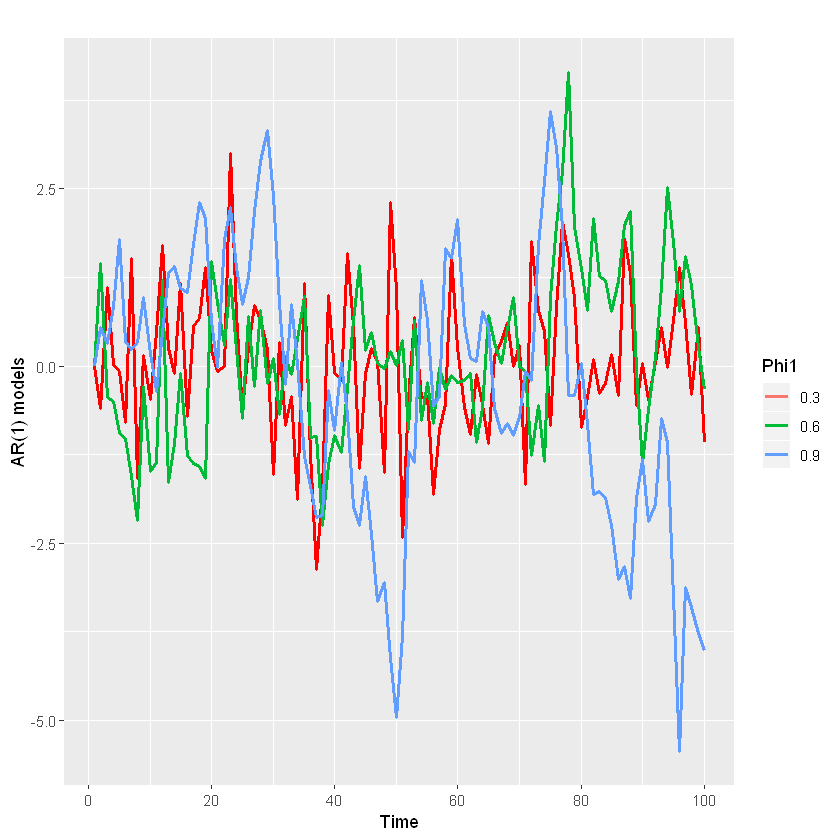

In [5]:
# produce plots changing phi1 value.
autoplot(ar1generator(0.3), series = "0.3") +
  geom_line(size = 1, colour = "red") +
  autolayer(y, series = "0.6", size = 1) +
  autolayer(ar1generator(0.9), size = 1, series = "0.9") +
  ylab("AR(1) models") +
  guides(colour = guide_legend(title = "Phi1"))
# As phi increases, the variation of y increased.

In [6]:
# c. Write your own code to generate data from an MA(1) model with theta1 = 0.6 and sigma^2 = 1.
ma1generator <- function(theta1){
  # generate 100 data points from an MA(1) model with input theta1.
  y <- ts(numeric(100))
  # error 'e's have variation sigma^2 as 1.
  e <- rnorm(100)
  for(i in 2:100){
    y[i] <- theta1*e[i-1] + e[i]
  }
  return(y)
}

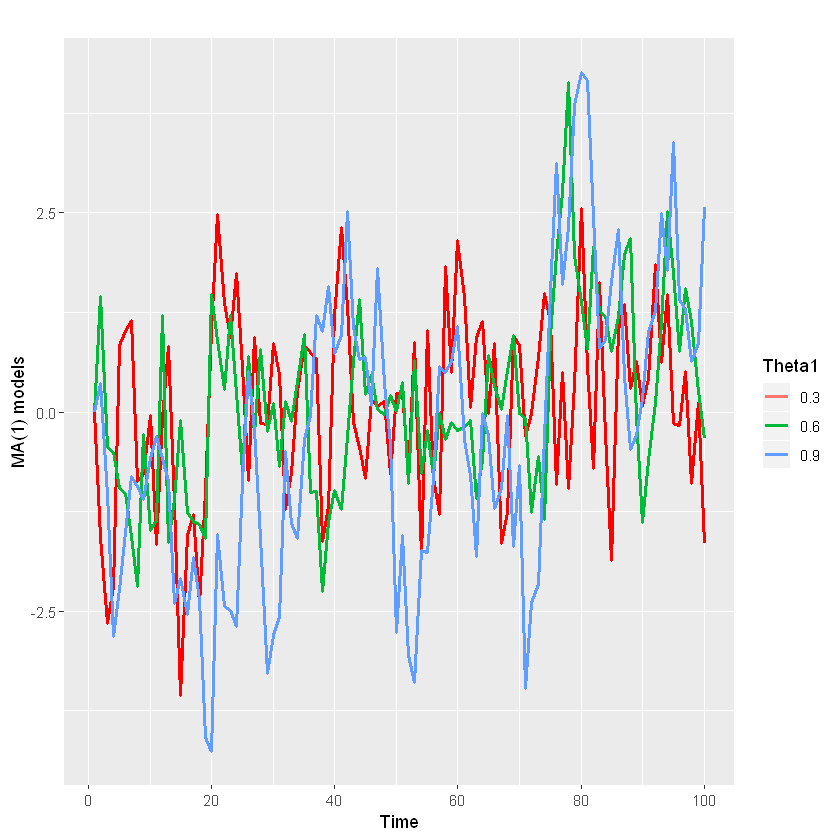

In [7]:
# d. Produce a time plot for the series. How does the plot change as you change theta1?
# produce plots changing theta1 value.
autoplot(ma1generator(0.3), series = "0.3") +
  geom_line(size = 1, colour = "red") +
  autolayer(y, series = "0.6", size = 1) +
  autolayer(ar1generator(0.9), size = 1, series = "0.9") +
  ylab("MA(1) models") +
  guides(colour = guide_legend(title = "Theta1"))
# As theta increases, the variation of y increased.

In [8]:
# e. Generate data from an ARMA(1,1) model with phi1 = 0.6, theta1 = 0.6 and sigma^2 = 1.
y_arima.1.0.1 <- ts(numeric(50))
e <- rnorm(50)
for(i in 2:50){
   y_arima.1.0.1[i] <- 0.6*y_arima.1.0.1[i-1] + 0.6*e[i-1] + e[i]
}

In [9]:
# f. Generate data from an AR(2) model with phi1 = -0.8, phi2 = 0.3 and sigma^2 = 1. (Note that these parameters will give a non-stationary series.)
y_arima.2.0.0 <- ts(numeric(50))
e <- rnorm(50)
for(i in 3:50){
   y_arima.2.0.0[i] <- -0.8*y_arima.2.0.0[i-1] + 0.3*y_arima.2.0.0[i-2] + e[i]
}

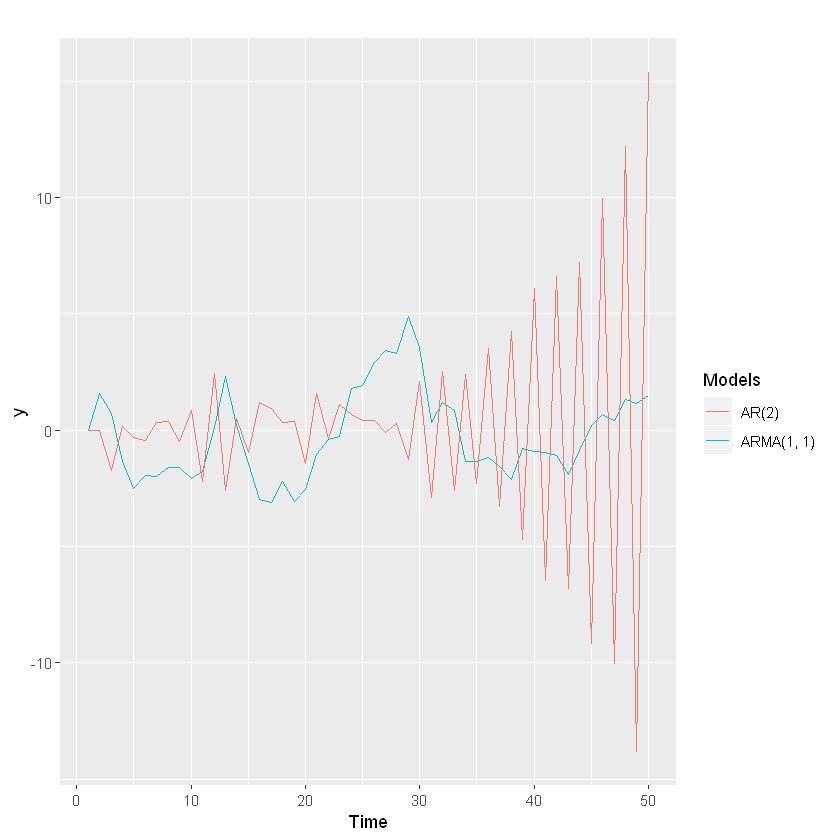

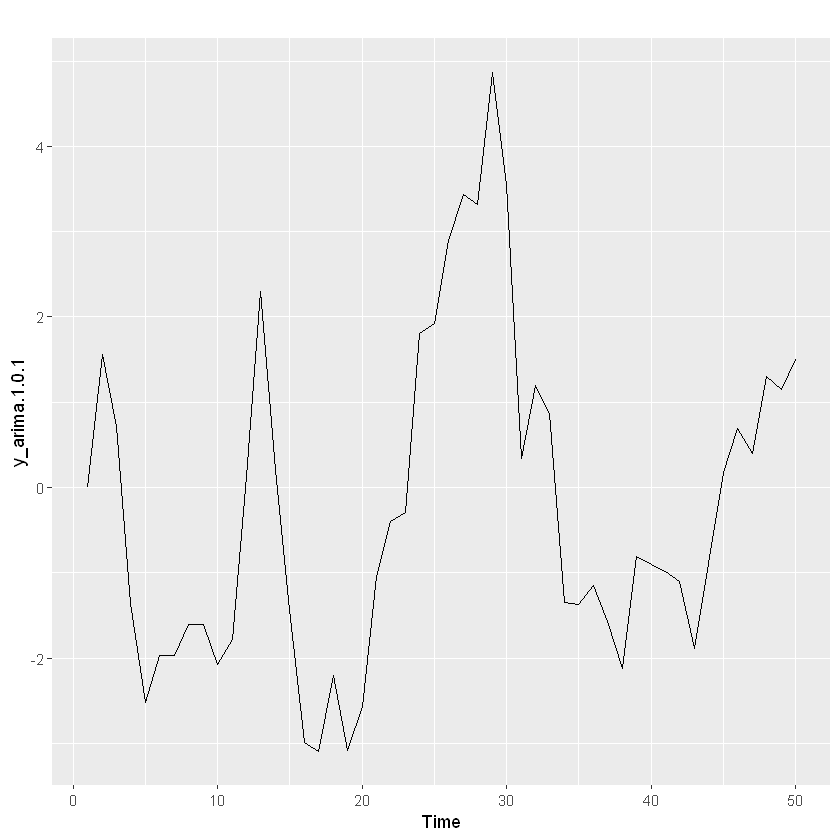

In [10]:
# g. Graph the latter two series and compare them.
autoplot(y_arima.1.0.1, series = "ARMA(1, 1)") +
  autolayer(y_arima.2.0.0, series = "AR(2)") +
  ylab("y") +
  guides(colour = guide_legend(title = "Models"))
autoplot(y_arima.1.0.1)